<a href="https://colab.research.google.com/github/HowdyDany/finance_reports/blob/main/Copy_of_Intro_to_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

## ML Definition & Example

### Definitions
- **Machine learning:** a fancy term for "model fitting"
- **Model:** an equation with parameters and data

### Linear Regression Example
Consider the following *linear regression* equation...

$$
\hat{y} = w * x + b
$$


* **Data**
  * **Target Variable:** ($\hat{y}$) This is the variable that you're trying to predict given other values. This is also called the _response_ / _predicted_ / _dependent_ / _label_ / _supervisor_ variable.
  * **Feature Variable:** ($x$)  These are the variables that we use to predict the value of the target. These are also called _explanatory_ / _predictor_ / _feature_ / _signal_ / _independent_ variables. 
* **Parameters** - Variables that the computer will adjust to get a better score.
  * **Coefficient**: ($w$) What we multiply our features by. In neural networks and ML, we call $w$ the _weight_.
  * **Intercept**: ($b$) What $y$ equals when $x$ is 0. In neural networks and ML we call $b$ the bias.



Consider the following *MSE* loss function...
  $$ℒ(w, b) := \frac{1}{n}\sum_{i=1}^n (y_i-\hat{y}_i)^2=\frac{1}{n}\sum_{i=1}^n (y_i-(wx_i+b))^2$$

* **Loss functions** - Used for the computer to find the best parameter values.
  * **Qualifications:** must be easily differentiable and always positive
  * **Goal:** to minimize the loss function by adjusting the parameters
  
Consider the following $R^2$ metric...
  $$R^2 = 1 - \frac{SSE}{SSR}$$
  $$SSE:=\sum_{i=1}^n (y_i-\hat{y}_i)^2$$
  $$SSR:=\sum_{i=1}^n (y_i-\bar{y}_i)^2$$
* **Score (or Evaluation Metric)** - How we report the model's performance in learning our data.
  - is interpretable and used to compare and choose the **best model**

## Data Science Process
![alt text](https://revsearch-assets.s3.amazonaws.com/images/ds_process2.png)

# Part 1: Model Fitting

## Classification vs Regression
![alt text](https://i0.wp.com/dataaspirant.com/wp-content/uploads/2014/09/Classification-and-Regression-dataaspirant.png?resize=690%2C518)

Classification (as opposed to regression) is used when our target is categorical. i.e. pass/fail.

**Other Examples:**
1. Marketing applications such as prediction of a customer’s propensity to purchase a product or halt a subscription.
2. Model whether the customer is going to “Default” or “Not Default” on a credit card.


## Interpretability vs Accuracy
* **Accuracy** - What percentage of the time did we get the predictions correct.
* **Interpretability** - How well we can explain why the computer made the decision it did.

<img src="https://miro.medium.com/max/1400/1*shNOspLyVn_2mvwves9MMA.png" alt="alt" width="600"/>

## Decision Trees

- [Intro to DT](https://www.youtube.com/watch?v=7VeUPuFGJHk)
- many state-of-the-art extentions build on decision trees
- DTs can be used for regression problems too!


**Example: Iris**

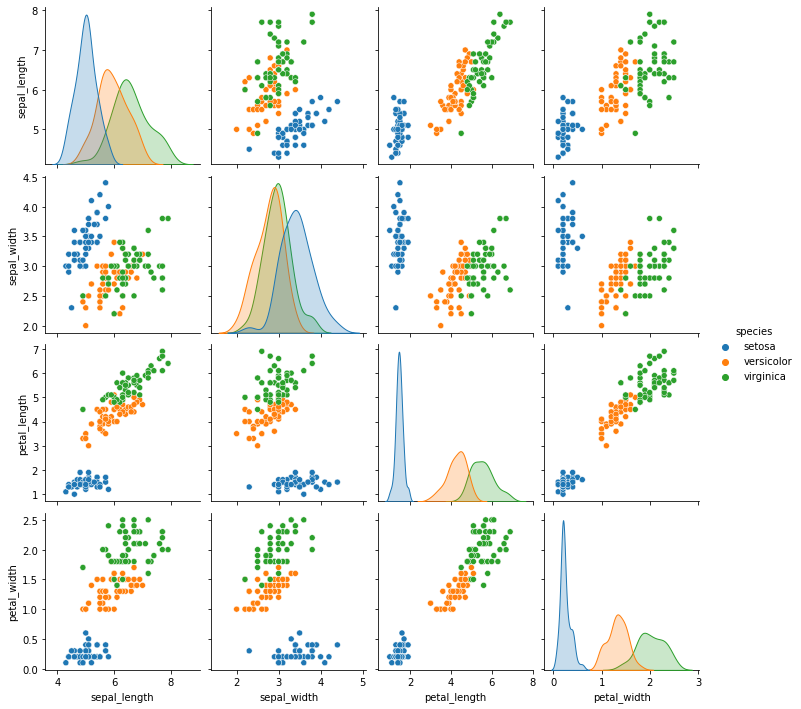

In [ ]:
# imports
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# load data
df = sns.load_dataset('iris')

# make plot
sns.pairplot(df, hue='species')
plt.show()

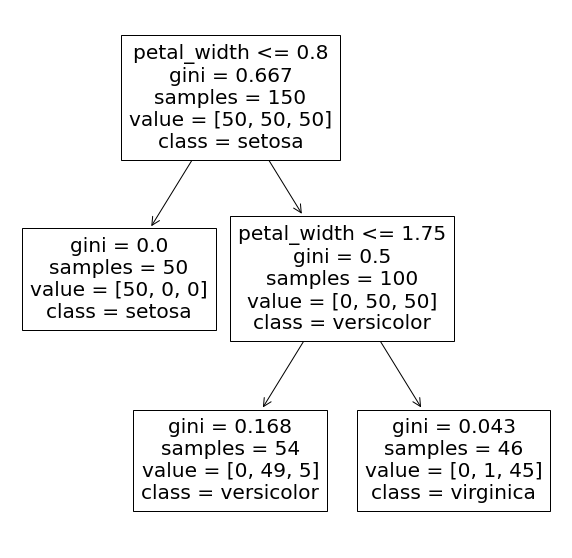

In [ ]:
# split data into features and target
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target_name = 'species'
X, y = df[feature_names], df[target_name]

from sklearn import tree
max_depth = 2 # set this
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=max_depth)
clf = clf.fit(X, y)

# plot decision tree
plt.figure(figsize=(10, 10))
tree.plot_tree(clf.fit(X, y), feature_names=X.columns, class_names=y.unique())
plt.show()

**Example: Titanic**

**Classification Problem**

In [ ]:
# load data
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Data Wrangling
## binary encoding for ismale
df['male'] = (df.sex == 'male').astype(int)
## one hot encoding for class
df = df.join(pd.get_dummies(df['class'], prefix='class'))
## fill in nan
df.age = df.age.fillna(df.age.median())

# split data into target and features
target_name = 'survived'
feature_names = ['male', 'fare', 'class_Second', 'class_Third', 'sibsp', 'age']
X, y = df[feature_names], df[target_name]

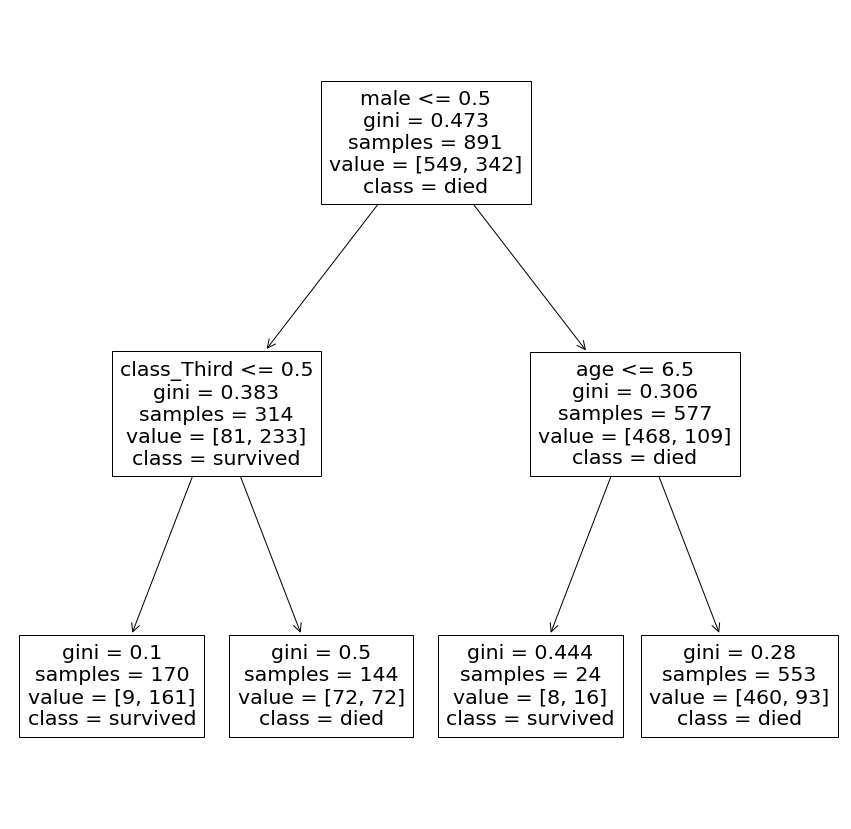

In [ ]:
max_depth = 2 # set this
clf = tree.DecisionTreeClassifier(max_depth=max_depth, random_state=0, min_impurity_decrease=.001)  # class_weight='balanced'
clf = clf.fit(X, y)
plt.figure(figsize=(15, 15))
tree.plot_tree(clf.fit(X, y), feature_names=feature_names, class_names=['died', 'survived'])
plt.show()

**Predict Survival**

In [ ]:
male = True #@param {type:"boolean"}
fare = 400 #@param {type:"slider", min:0, max:500, step:10}
second_class = False
third_class = False #@param {type:"boolean"}
siblings = 3 #@param {type:"slider", min:0, max:8, step:1}
age = 48 #@param {type:"slider", min:0, max:80, step:1}

prob = clf.predict_proba([[male, fare, second_class, third_class, siblings, age]])
print("Your probablity of surviving is", round(prob[0][1], 2))

Your probablity of surviving is 0.17


**Regression Problem**

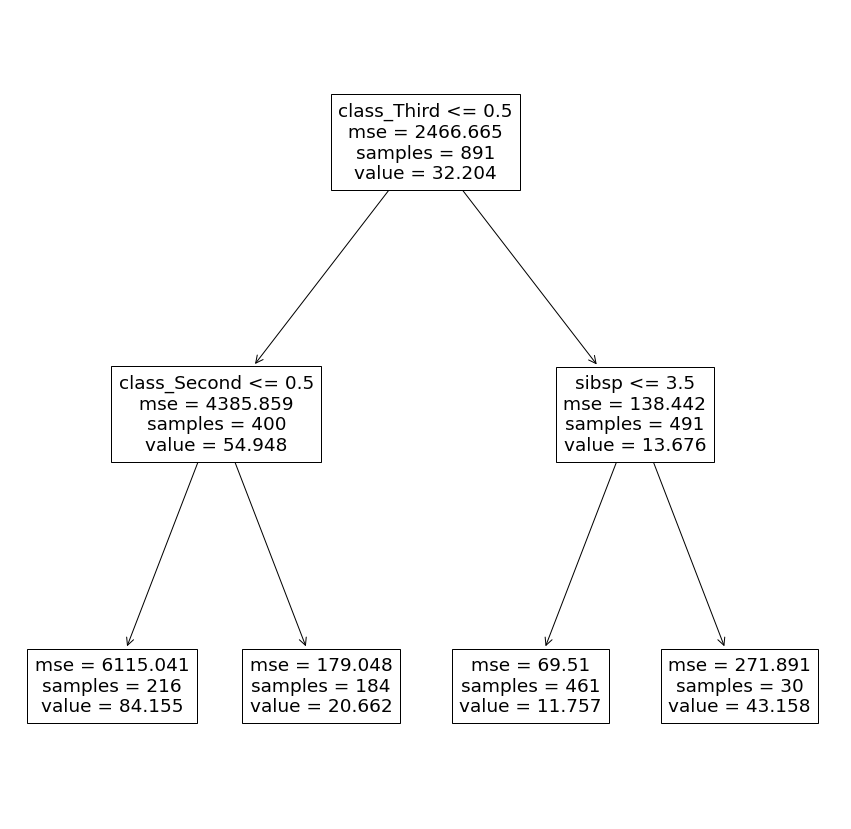

In [ ]:
target_name_ = 'fare'
# sibsp stands for the number of sibilings and parents on board
feature_names_ = ['male', 'class_Second', 'class_Third', 'sibsp', 'age']
X_, y_ = df[feature_names_], df[target_name_]

clf = tree.DecisionTreeRegressor(max_depth=2, random_state=0, min_impurity_decrease=.001)  # class_weight='balanced'
clf = clf.fit(X_, y_)
plt.figure(figsize=(15, 15))
tree.plot_tree(clf.fit(X_, y_), feature_names=feature_names_)
plt.show()

## Overfitting and Underfitting
![alt text](https://miro.medium.com/max/1125/1*_7OPgojau8hkiPUiHoGK_w.png)

- **Overfitting:** the model is too well fit to the given data and not generalizable to different data inputs
- **Underfitting:** the model is too poorly fit to the data

![alt text](https://i.stack.imgur.com/rpqa6.jpg)

### Test Train Split
**What does it do?** Test-train-split helps prevent overfitting by splitting the data into a training set and testing set

- **training set:** the model will be fit to this set
- **testing set:** the model will be evaluated against this set

**Example: Titanic**

In [ ]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

# see how the data was split
print(f"Percent survived in all data: {round(y.mean(), 2)*100}%")
print(f"Percent survived in the test data: {round(y_test.mean(), 2)*100}%")
print(f"Percent survived in the train data: {round(y_train.mean(), 2)*100}%")

Percent survived in all data: 38.0%
Percent survived in the test data: 39.0%
Percent survived in the train data: 38.0%


In [ ]:
# fit the classifier on the training data
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=100).fit(X_train, y_train)

# evaluate the classifier on the training and testing data
print(f"Training Score: {round(clf.score(X_train, y_train), 2)}")
print(f"Testing Score: {round(clf.score(X_test, y_test), 2)}")

Training Score: 0.99
Testing Score: 0.79


### Cross Validation

- We test/train split multiple times, over various partitions of the data

![cv](https://upload.wikimedia.org/wikipedia/commons/b/b5/K-fold_cross_validation_EN.svg)

**Example: Titanic**

In [ ]:
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X, y, cv=5)
print(scores)
scores.mean()

[0.7150838  0.7752809  0.85393258 0.7752809  0.82022472]


0.7879605800012554

## Random Forests

- Form of *boostrap aggregating*, AKA *bagging*
- Subsetting the rows (observations) and columns (features)
- Smaller trees
  - making a tree smaller lowers variance (good) but also increases bias (bad)
  - bagging from many small trees decreases bias

![](https://upload.wikimedia.org/wikipedia/commons/7/76/Random_forest_diagram_complete.png)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0, max_depth=10).fit(X_train, y_train)
print(f"Training Score: {round(clf.score(X_train, y_train), 2)}")
print(f"Testing Score: {round(clf.score(X_test, y_test), 2)}")

Training Score: 0.95
Testing Score: 0.81


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)
print(scores)
scores.mean()

[0.76536313 0.81460674 0.86516854 0.82022472 0.84269663]


0.8216119515410206

## Feature Importance
Benefits of selecting features according to importance...
- build more interpretable methods
- fewer features to worry about cleaning, collecting, etc.
- save computational time and space in training 

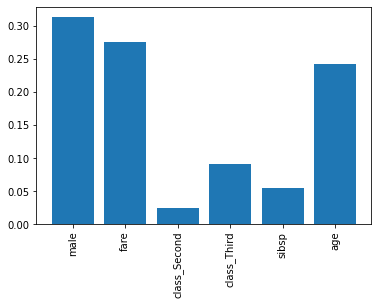

In [ ]:
# plot feature importance
plt.bar(feature_names, clf.feature_importances_)
plt.xticks(rotation=90)
plt.show()

## **Hyperparameter Tuning** 
**What does it do?** helps you to find the best model!

- Sklearn offers grid search
- More advanced search methods exist: [optuna](https://optuna.org/)

In [ ]:
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [10, 50, 100, 1000]
# Maximum number of levels in tree
max_depth = [5, 10, 20, 40, 80]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 10, 20, 40, 80, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 50, 100, 1000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=0, n_jobs=-1)
# Fit the random search model
_ = rf_random.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 166 tasks      | elapsed:   58.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.7min finished


In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 40,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 10}

In [ ]:
rf_random.best_score_

0.8327721661054994

# Part 2: Post-hoc Analysis

## Evaluation Metrics

If your classes are imbalanced, accuracy is not the best score. Some other things to consider...
- weighted accuracy
- false positives, etc
- precision / recall / F1

### Weighted Accuracy

In [ ]:
# balance unbalanced classes
import numpy as np

def get_balance_weights(y):
  n_samples = len(y)
  n_classes = y.nunique()
  return n_samples / (n_classes * np.bincount(y))

classes = df.groupby('survived').survived.count().rename('count').to_frame()
weights = get_balance_weights(df.survived)
classes['weight'] = weights
print(classes)

          count    weight
survived                 
0           549  0.811475
1           342  1.302632


In [ ]:
# recalculating accuracy for unbalanced classes...
from sklearn.ensemble import RandomForestClassifier
sample_weight = np.where(y == 0, weights[0], weights[1])
print("Acc:", round(clf.score(X, y), 3))
print("Acc Weighted:", round(clf.score(X, y, sample_weight=sample_weight), 3))

Acc: 0.912
Acc Weighted: 0.899


### Confusion Matrix
- **What does it do?** It is a way to visualize our model's success. In short, you want the highest numbers along the diagonal (TP & TN). We'd like 0's everywhere else (FN & FP)!

![alt text](https://miro.medium.com/max/1024/1*-BkpqhN-5fPicMifDQ0SwA.png)


* **True Positive** - When we predicted positive and the ground truth was positive
* **True Negative** - When we predicted negative and the ground truth was negative.
* **False Positive** - When we predicted positive and the ground truth was negative
* **False Negative** - When we predicted negative and the ground truth was positive

In [ ]:
def true_pos(y_truth, y_pred):
  return np.logical_and(y_pred == 1, y_truth == 1)

def true_neg(y_truth, y_pred):
  return np.logical_and(y_pred == 0, y_truth == 0)

def false_pos(y_truth, y_pred):
  return np.logical_and(y_pred == 1, y_truth == 0)

def false_neg(y_truth, y_pred):
  return np.logical_and(y_pred == 0, y_truth == 1)

### Precision, Recall and F1

- **Precision** - **P**(actually positive | predicted positive)
- **Recall** - **P**(predicted positive | actually positive)
- **F1** - A (harmonic) mean of the recall and precision

In [ ]:
def precision(y_truth, y_pred):
  return true_pos(y_truth, y_pred).sum() / (true_pos(y_truth, y_pred).sum() + false_pos(y_truth, y_pred).sum())

def recall(y_truth, y_pred):
  return true_pos(y_truth, y_pred).sum() / (true_pos(y_truth, y_pred).sum() + false_neg(y_truth, y_pred).sum())

def f1(y_truth, y_pred):
  prec = precision(y_truth, y_pred)
  recl = recall(y_truth, y_pred)
  return 2 * ((prec*recl)/(prec+recl))